In [337]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
plt.rcParams['svg.fonttype'] = 'none'

In [338]:
def binarize(g):
    g = g.lower()
    return 1 if g == 'growth' else 0

In [339]:
biolog = {}
for i in os.listdir():
    if 'biolog_' not in i: continue
    B = pd.read_excel(i,sheet_name=None,index_col=0)
    name = i.split('biolog_')[1].split('.xlsx')[0]
    print(name)
    for PM,df in B.items():
        if 'rhodo' in i:
            col = 'Simulation2'
        else:
            col = 'Simulation'
        for s,row in df.iterrows():
            if s.lower() == 'control' :continue
            met = s+'_'+PM
            if met not in biolog:
                biolog[met] = {
                    'PM':PM,
                    'ID':row['ID '],
                    'Growth':row['Growth'] if row['Growth'] > 0 else 0,
                    'Experimental':binarize(row['Experimental'])
                }
            biolog[met][name] = binarize(row[col])


paper2
paper1
rhodo


In [340]:
biolog_df = pd.DataFrame.from_dict(biolog).T.replace('not growth','non-growth')
biolog_df = biolog_df.rename(index={k:k.split('_PM')[0] for k in biolog_df.index})

In [341]:
biolog_df.to_csv('summary.csv')

In [343]:
biolog_df.loc['L-Threonine']

,PM,ID,Growth,Experimental,paper2,paper1,rhodo
L-Threonine,PM1,thr__L_e,0.0,0,0,0,1
L-Threonine,PM3,thr__L_e,0.0,0,0,0,0


In [276]:
max_g = biolog_df['Growth'].max()
min_g = 0.

In [287]:
max_g

0.022297290391136596

In [275]:
biolog_df.sort_values('Growth').iloc[80:90,:]

,PM,ID,Growth,Experimental,paper2,paper1,rhodo
Ethylenediamine,PM3,NaN,0.000000,0,0,0,0
a-Hydroxyglutaric Acid-g-Lactone,PM1,NaN,0.000000,0,0,0,0
a-Hydroxybutyric Acid,PM1,NaN,0.000000,0,0,0,0
a-Ketobutyric Acid,PM1,2obut_c,0.000000,0,0,0,0
N-Amylamine,PM3,NaN,0.000000,0,0,0,0
Agmatine,PM3,agm_e,0.000000,0,0,0,0
Putrescine,PM3,ptrc_e,0.000000,0,0,0,0
Glycogen,PM2,glycogen_e,0.000026,1,0,0,1
a-Methyl-D-Glucoside,PM2,madg_e,0.000053,1,0,0,1
L-Lysine,PM2,lys__L_e,0.000069,1,1,0,0


In [333]:
biolog_df[biolog_df['PM'].str.contains('PM3')].sort_values('Growth',ascending=False)

,PM,ID,Growth,Experimental,paper2,paper1,rhodo
Ala-Gly,PM3,NaN,0.012687,1,0,0,1
L-Glutamine,PM3,gln__L_e,0.012534,1,1,0,1
Gly-Gln,PM3,gly_gln__L_e,0.012519,1,1,0,1
Gly-Asn,PM3,gly_asn__L_e,0.012125,1,0,0,1
Ammonia,PM3,nh4_e,0.011783,1,1,1,1
...,...,...,...,...,...,...,...
Tyramine,PM3,tym_e,0.000000,0,0,0,0
Formamide,PM3,frmd_e,0.000000,0,0,0,0
Glucuronamide,PM3,NaN,0.000000,0,0,0,0
D-Galactosamine,PM3,galam_e,0.000000,0,0,0,0


In [283]:
import seaborn as sns
def plot_hm(pm):
    df = biolog_df[biolog_df['PM'].str.contains(pm)].sort_values('Growth',ascending=False)
    l = len(df.index)/3
    plt.figure(figsize=(1,l))
    sns.heatmap(df[['Growth']],
                annot=True,
                cmap = sns.color_palette("Blues",100),
                vmin = min_g, vmax = max_g,
                mask=(df[['Growth']]==0)
               )
    plt.savefig('growth_{}.svg'.format(pm),format='SVG') 
    
    plt.figure(figsize=(5,l))
    sns.heatmap(df[['Experimental','paper1','paper2','rhodo']],
                annot=False,
                cmap = sns.cubehelix_palette(as_cmap=True)
               )
    plt.savefig('heatmap_{}.svg'.format(pm),format='SVG')

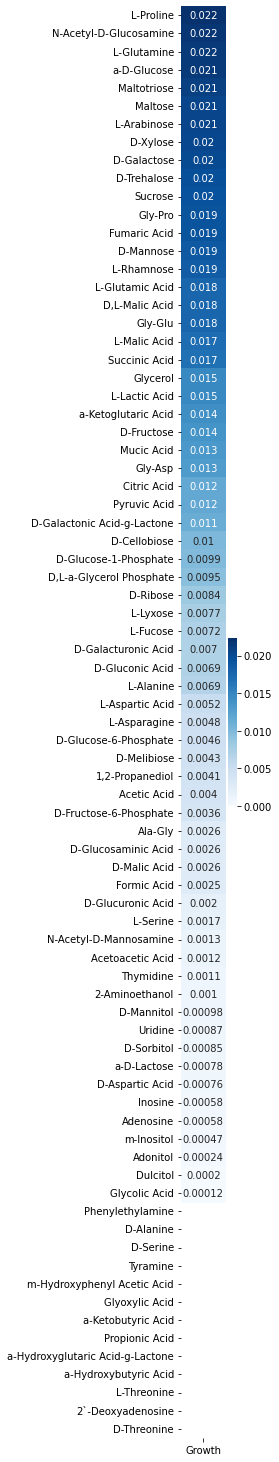

In [284]:
plot_hm('PM1')

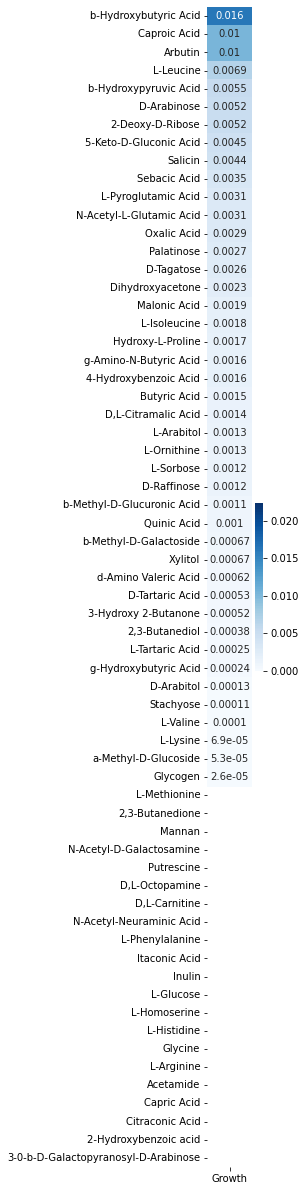

In [285]:
plot_hm('PM2')

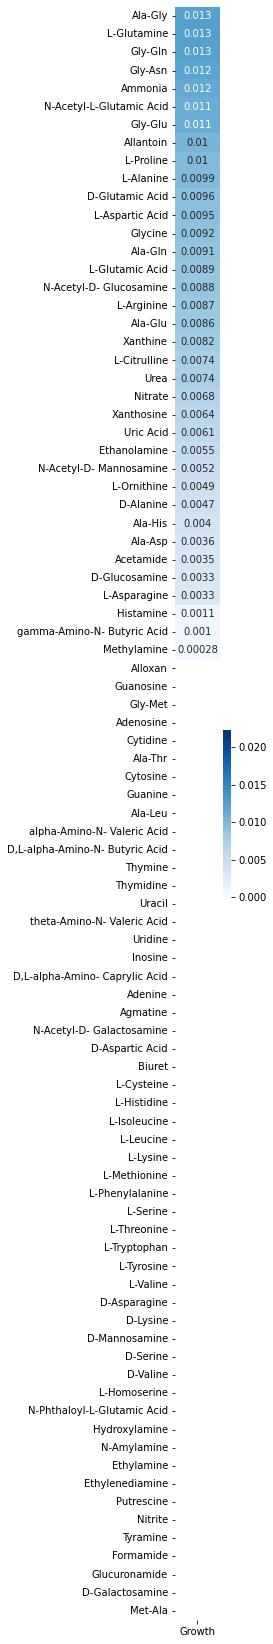

In [286]:
plot_hm('PM3')

In [327]:
names = ['paper1','paper2','rhodo']
df = biolog_df

In [328]:
for name in names:
    tp = df[(df['Experimental'] == 1) & (df[name] == 1)].shape[0]
    fp = df[(df['Experimental'] == 0) & (df[name] == 1)].shape[0]
    tn = df[(df['Experimental'] == 0) & (df[name] == 0)].shape[0]
    fn = df[(df['Experimental'] == 1) & (df[name] == 0)].shape[0]

    d[name] = {
        'tp':tp,
        'fp':fp,
        'tn':tn,
        'fn':fn,
        'tpr' : tp/(tp+fn),
        'tnr' : tn/(tn+fp),
        'ba' : 0.5*((tp/(tp+fn))+(tn/(tn+fp))),
        'mcc' : (tp*tn - fp*fn) / ((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**0.5
    } 
confusion_df = pd.DataFrame.from_dict(d).T
confusion_df

,tp,fp,tn,fn,tpr,tnr,ba,mcc
rhodo,117.0,2.0,85.0,28.0,0.806897,0.977011,0.891954,0.759270
paper1,9.0,2.0,85.0,136.0,0.062069,0.977011,0.519540,0.089025
paper2,40.0,12.0,75.0,105.0,0.275862,0.862069,0.568966,0.160128


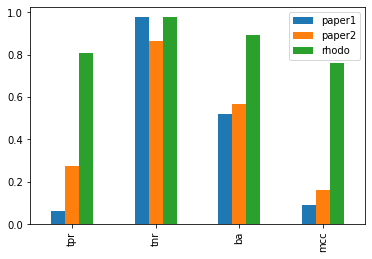

In [329]:
confusion_df[['tpr','tnr','ba','mcc']].T[names].plot.bar()
plt.savefig('confusion.svg',format='SVG')

In [330]:
confusion_df

,tp,fp,tn,fn,tpr,tnr,ba,mcc
rhodo,117.0,2.0,85.0,28.0,0.806897,0.977011,0.891954,0.759270
paper1,9.0,2.0,85.0,136.0,0.062069,0.977011,0.519540,0.089025
paper2,40.0,12.0,75.0,105.0,0.275862,0.862069,0.568966,0.160128


In [319]:
55+35+27,12+20+56,2,11+8+6

(117, 88, 2, 25)